In [1]:
import os
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense , Dropout
import json
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from keras.models import load_model
from keras.preprocessing import image
import matplotlib.pyplot as plt
from IPython.display import Image, display
import json


2023-12-16 13:44:22.431222: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Define the root directory where your data is stored
root_dir = '/Users/ismail/Desktop/LAMBTON/Semester3/project/Final/output_1/'

sz = 128
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(os.path.join(root_dir, 'train'),
                                                 target_size=(sz, sz),
                                                 batch_size=10,
                                                 color_mode='grayscale',
                                                 class_mode='categorical')

test_set = test_datagen.flow_from_directory(os.path.join(root_dir, 'val'),
                                            target_size=(sz , sz),
                                            batch_size=10,
                                            color_mode='grayscale',
                                            class_mode='categorical') 


# Step 1 - Building the CNN

# Initializing the CNN
classifier = Sequential()

# First convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), input_shape=(sz, sz, 1), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
# Second convolution layer and pooling
classifier.add(Convolution2D(32, (3, 3), activation='relu'))
# input_shape is going to be the pooled feature maps from the previous convolution layer
classifier.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening the layers
classifier.add(Flatten())

# Adding a fully connected layer
classifier.add(Dense(units=128, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=96, activation='relu'))
classifier.add(Dropout(0.2))
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dense(len(training_set.class_indices), activation='softmax')) # softmax for more than 2

# Compiling the CNN
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) # categorical_crossentropy for more than 2


# Step 2 - Preparing the train/test data and training the model
classifier.summary()

history = classifier.fit_generator(
        training_set,
        # No of images in training set
        epochs=20,
        validation_data=test_set,
        steps_per_epoch=len(training_set),  # Number of batches per epoch
        validation_steps=len(test_set))# No of images in test set


Found 286 images belonging to 27 classes.
Found 117 images belonging to 27 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                      

/var/folders/_f/chvc84n13j5fnb89bxmflrvc0000gp/T/ipykernel_11010/2551077538.py:59: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = classifier.fit_generator(


Epoch 1/20


2023-12-16 13:44:36.240601: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


29/29 [==============================] - ETA: 0s - loss: 3.3713 - accuracy: 0.0210

2023-12-16 13:44:44.277075: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


29/29 [==============================] - 9s 219ms/step - loss: 3.3713 - accuracy: 0.0210 - val_loss: 3.2898 - val_accuracy: 0.0342
Epoch 2/20
29/29 [==============================] - 6s 206ms/step - loss: 3.2972 - accuracy: 0.0420 - val_loss: 3.2904 - val_accuracy: 0.0855
Epoch 3/20
29/29 [==============================] - 6s 215ms/step - loss: 3.2793 - accuracy: 0.0490 - val_loss: 3.3477 - val_accuracy: 0.0342
Epoch 4/20
29/29 [==============================] - 6s 215ms/step - loss: 3.2972 - accuracy: 0.0664 - val_loss: 3.1944 - val_accuracy: 0.0769
Epoch 5/20
29/29 [==============================] - 6s 219ms/step - loss: 3.1154 - accuracy: 0.1329 - val_loss: 2.5424 - val_accuracy: 0.3162
Epoch 6/20
29/29 [==============================] - 6s 221ms/step - loss: 2.4356 - accuracy: 0.2902 - val_loss: 1.6156 - val_accuracy: 0.5128
Epoch 7/20
29/29 [==============================] - 7s 222ms/step - loss: 1.6531 - accuracy: 0.4930 - val_loss: 1.0910 - val_accuracy: 0.6496
Epoch 8/20
29/29 

In [ ]:
# Get the class indices from the training_set
class_indices = training_set.class_indices

# Save the class indices and class labels to a JSON file
with open('/Users/ismail/Desktop/LAMBTON/Semester3/project/Final/output_1/class_indices.json', 'w') as json_file:
    json.dump(class_indices, json_file)

print("Class indices saved to 'class_indices.json'")

classifier.save('/Users/ismail/Desktop/LAMBTON/Semester3/project/Final/output_1/latest.h5')


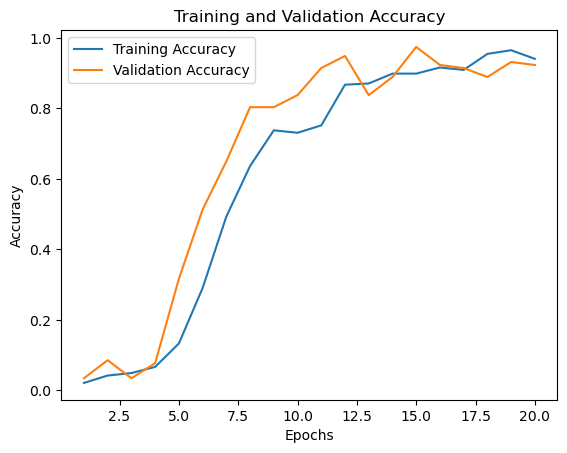

In [3]:
# Plotting the Training Accuracy and Validation Accuracy of a Model.
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, label='Training Accuracy')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
# Load the class indices from the JSON file
with open('/Users/ismail/Desktop/LAMBTON/Semester3/project/Final/output_1/class_indices.json', 'r') as json_file:
    class_indices = json.load(json_file)

# Load the trained model
model_path = '/Users/ismail/Desktop/LAMBTON/Semester3/project/Final/output_1/latest.h5'
model = load_model(model_path)

# Define the region of interest (ROI) coordinates
roi_x, roi_y, roi_width, roi_height = 100, 100, 250, 250

# Function to preprocess the input image
def preprocess_image(img):
    # Resize the image to match the model's expected sizing
    img = cv2.resize(img, (128, 128))
    
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian Blur
    blur = cv2.GaussianBlur(gray, (5, 5), 2)
    
    # Adaptive Thresholding
    th3 = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 2)
    
    # Global Thresholding using Otsu's method
    ret, result_mask = cv2.threshold(th3, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Expand dimensions to match model input dimensions
    result_mask = np.expand_dims(result_mask, axis=-1)
    
    # Normalize the image
    result_mask = result_mask / 255.0
    
    # Reshape to match the input shape expected by the model
    result_mask = np.reshape(result_mask, (1, 128, 128, 1))
    
    return result_mask

# Function to predict using the model
def predict(model, img):
    img = preprocess_image(img)
    prediction = model.predict(img)
    return prediction

# Open a connection to the webcam
cap = cv2.VideoCapture(0)


while True:
    # Read a frame from the webcam
    ret, frame = cap.read()
    # Extract the region of interest (ROI)
    roi = frame[roi_y:roi_y + roi_height, roi_x:roi_x + roi_width]
    
    # Perform prediction
    result = predict(model, roi)
    
    # Get the predicted class index
    
    predicted_label = [label for label, index in class_indices.items() if index == np.argmax(result)][0]
    
    # Draw a rectangle around the region of interest
    cv2.rectangle(frame, (roi_x, roi_y), (roi_x + roi_width, roi_y + roi_height), (0, 255, 0), 2)
    
    # Put the predicted label on the frame
    cv2.putText(frame, f'Prediction: {predicted_label}', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    
    # Display the resulting frame
    cv2.imshow('Webcam Prediction', frame)
    
    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the webcam and close the OpenCV window
cap.release()
cv2.destroyAllWindows()
